### Removal of outliers by Zscore method

In [1]:
import pandas as pd
df=pd.read_csv("weight-height.csv")
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
df.shape


(10000, 3)

In [49]:
df1=df.drop(["Weight"],axis="columns")
df1.shape

(10000, 2)

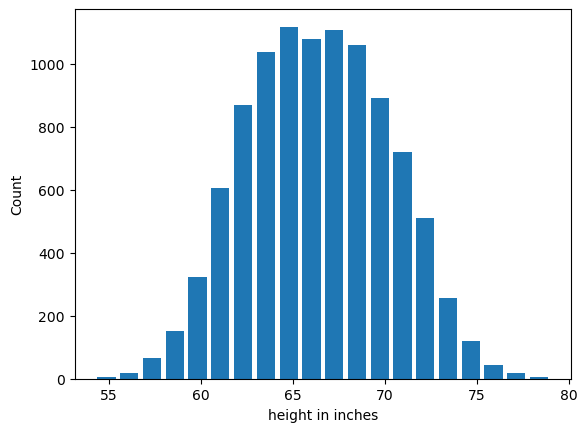

In [7]:
import matplotlib.pyplot as plt
plt.hist(df1.Height,bins=20,rwidth=0.8)
plt.xlabel("height in inches")
plt.ylabel("Count")
plt.show()

In [50]:
df1.Height.mean()

66.36755975482106

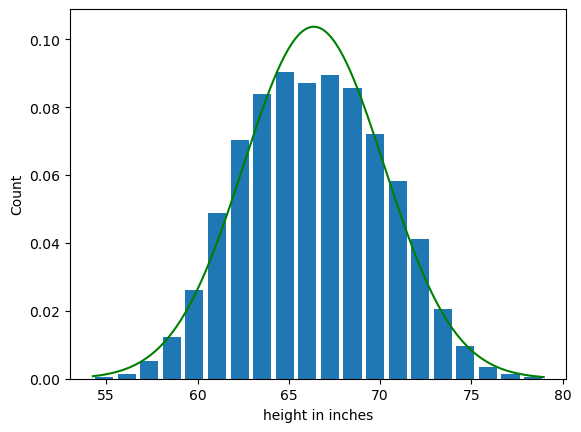

In [51]:
from scipy.stats import norm
import numpy as np
plt.hist(df1.Height,bins=20,rwidth=0.8,density=True)
plt.xlabel("height in inches")
plt.ylabel("Count")
rng=np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.Height.mean(),df.Height.std()),color='green')


In [52]:
df1.Height.std()


3.8475281207732324

In [53]:
upper_limit=df1.Height.mean()+3*df1.Height.std()
upper_limit

77.91014411714076

In [54]:
lower_limit=df1.Height.mean()-3*df1.Height.std()


In [19]:
df1.Height

0       73
1       68
2       74
3       71
4       69
        ..
9995    66
9996    67
9997    63
9998    69
9999    61
Name: Height, Length: 10000, dtype: int32

In [55]:
upper_limit=df1.Height.mean()+3*df1.Height.std()

In [56]:
upper_limit

77.91014411714076

In [57]:
lower_limit=df1.Height.mean()-3*df1.Height.std()
lower_limit

54.82497539250136

In [58]:
df2=df1[(df1.Height>lower_limit)&(df1.Height<upper_limit)]
df2
       

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [59]:
df1.shape

(10000, 2)

In [61]:
df1['zscore']=(df1.Height-df1.Height.mean())/df1.Height.std()

In [62]:
df1

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [64]:
df1[df1['zscore']<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [66]:
df_with_no_outliers=df1[(df1['zscore']<3)&(df1['zscore']>-3)]
df_with_no_outliers

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
